In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

import shutil
from tqdm import tqdm
from tensorflow.keras.models import Sequential, save_model, load_model


dataset/train\nonrecyclable
dataset/train\nonrecyclable\1651880570497.png
<class 'numpy.ndarray'>


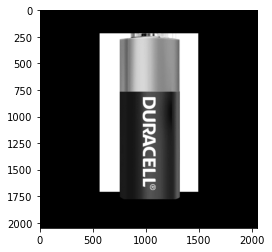

dataset/train\recyclable
dataset/train\recyclable\1652345420632.jpeg
<class 'numpy.ndarray'>


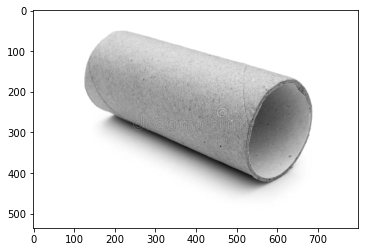

In [2]:
DATADIR = "dataset/train"
CATEGORIES = ["nonrecyclable", "recyclable"]

for category in CATEGORIES:  # do bad and good
    path = os.path.join(DATADIR,category)  # create path to nonrecyclable and recyclable
    print(path) #Check path
    for img in os.listdir(path):  # iterate over each image per nonrecyclable and recyclable
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE )  # convert to array 
        print(os.path.join(path,img)) #Check Image path
        print(type(img_array))   # Check Image converted type
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
#     break  #...and one more!
    

In [3]:
training_data = []
IMG_SIZE = 50   #to resize the image

def create_training_data():
    for category in CATEGORIES:   # do nonrecyclable, recyclable

        path = os.path.join(DATADIR,category)  # create path to nonrecyclable, recyclable
        class_num = CATEGORIES.index(category)  # get the classification (0=nonrecyclable, 1=recyclable)

        for img in tqdm(os.listdir(path)):  # iterate over each image per nonrecyclable, recyclable
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data() #Run the Method Created
print(len(training_data)) # Print the amount of images in training dataset


100%|██████████| 1655/1655 [00:09<00:00, 175.85it/s]

2275


In [4]:
# Shuffle the train data
random.shuffle(training_data) 

# Check the train data were shuffled successful
print("Check Shuffled Data: ")
for sample in training_data[:10]:
    print(sample[1])

Check Shuffled Data: 
1
1
1
1
1
1
1
1
1
0


In [5]:
#Add the trained data into a list
X = [] #list
y = [] #list

#for loop statement to append features and label in the x and y list
for features,label in training_data:
    X.append(features) 
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # convert to array
y=np.array(y)

In [6]:
np.shape(X) # shows the numbers of images and the images size in position x and y

(2275, 50, 50, 1)

In [8]:
# Save the processed Training Data into a pickle file
pickle_out = open("pickle_file/X_CNN.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("pickle_file/y_CNN.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [9]:
# Load the classifier from the pickle
pickle_in = open("pickle_file/X_CNN.pickle","rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("pickle_file/y_CNN.pickle","rb")
y = pickle.load(pickle_in)
pickle_in.close()

In [10]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [11]:
y=np.array(y)
X= X/255.0

model = Sequential() #to stack sequential layers of the network in order

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:])) #Convolutional Layer
#32 is the number of output channels, kernel_size is (3,3) where it refers to the width x height of the filter mask

model.add(Activation('relu'))
# relu, which is rectified linear unit is activated, to output the input directly if it is positive or else will output 0

model.add(MaxPooling2D(pool_size=(2, 2))) # Max Pooling Layer is to specify the size of the pooling in the x and y directions

#Below are two more layers created for improved accuracy
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Fully Connected Layer converts our 3D feature maps to 1D feature vectors

model.add(Dense(64)) # Fully Connected Layer to connect each layer with another layer deeper than itself by the neurons in a network layer

model.add(Dense(4)) # the number of classes
model.add(Activation('softmax')) 
# this layer if the final layer also known as Logits layer, to return a probability distribution over the target classes in a 
# multiclass classification problem

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') # to compile our model
#use sparse_categorical_crossentropy for our loss function, use accuracy metric to see the accuracy score on the validation set,
#optimizer is use to control the learning rate

history = model.fit(X, y, batch_size=32, epochs=100, validation_split=0.3) # this layer is to train our model
#epochs is the number of times the model will cycle through the data, batch_size is a number of samples processed before
#the model is updated, 

Epoch 1/100
50/50 [==============================] - 3s 58ms/step - loss: 0.6355 - accuracy: 0.7180 - val_loss: 0.6010 - val_accuracy: 0.7394
Epoch 2/100
50/50 [==============================] - 3s 60ms/step - loss: 0.5898 - accuracy: 0.7224 - val_loss: 0.5898 - val_accuracy: 0.7394
Epoch 3/100
50/50 [==============================] - 3s 64ms/step - loss: 0.5723 - accuracy: 0.7198 - val_loss: 0.5540 - val_accuracy: 0.7394
Epoch 4/100
50/50 [==============================] - 3s 69ms/step - loss: 0.5527 - accuracy: 0.7217 - val_loss: 0.5484 - val_accuracy: 0.7423
Epoch 5/100
50/50 [==============================] - 3s 66ms/step - loss: 0.5225 - accuracy: 0.7299 - val_loss: 0.5427 - val_accuracy: 0.7408
Epoch 6/100
50/50 [==============================] - 3s 64ms/step - loss: 0.5044 - accuracy: 0.7481 - val_loss: 0.5461 - val_accuracy: 0.7408
Epoch 7/100
50/50 [==============================] - 4s 73ms/step - loss: 0.4979 - accuracy: 0.7506 - val_loss: 0.5574 - val_accuracy: 0.7365
Epoch 

50/50 [==============================] - 4s 75ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 2.4505 - val_accuracy: 0.7526
Epoch 59/100
50/50 [==============================] - 4s 80ms/step - loss: 0.0119 - accuracy: 0.9987 - val_loss: 2.1649 - val_accuracy: 0.7438
Epoch 60/100
50/50 [==============================] - 4s 79ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.2503 - val_accuracy: 0.7379
Epoch 61/100
50/50 [==============================] - 4s 76ms/step - loss: 0.0098 - accuracy: 0.9994 - val_loss: 2.1235 - val_accuracy: 0.7408
Epoch 62/100
50/50 [==============================] - 4s 83ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 2.2121 - val_accuracy: 0.7540
Epoch 63/100
50/50 [==============================] - 4s 77ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 1.9712 - val_accuracy: 0.7145
Epoch 64/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 2.1905 - val_accuracy: 0.7350
Epoch 65/100

In [14]:
model.metrics_names # Show the name of the metrics

['loss', 'accuracy']

72/72 - 1s - loss: 0.7633 - accuracy: 0.9196 - 910ms/epoch - 13ms/step


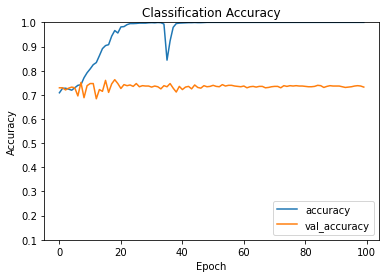

In [16]:
plt.plot(history.history['accuracy'], label='accuracy') # acc in certain computers can be named as accuracy
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # val_acc in certain computers can be named as val_accuracy
plt.title('Classification Accuracy') #llabel the name of the graph
plt.xlabel('Epoch') # label the x position as Epoch
plt.ylabel('Accuracy') # label the y position as Accuracy
plt.ylim([0.1, 1]) # to show the accuracy rate between 0.1 and 1
plt.legend(loc='lower right') # to describe the elements of the graph

test_loss, test_acc = model.evaluate(X,  y, verbose=2) # evaluate the model on the test data

In [17]:
print(test_acc) # output the accuracy result

0.919560432434082


In [31]:
# A few random samples
use_samples = [1, 5, 6, 22, 47, 50, 67, 72, 73, 93]
samples_to_predict = []

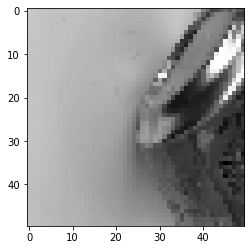

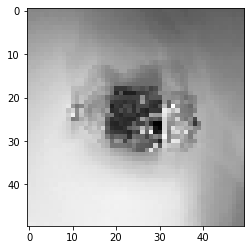

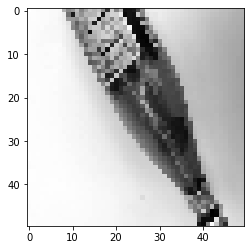

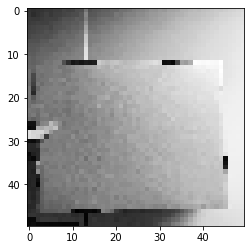

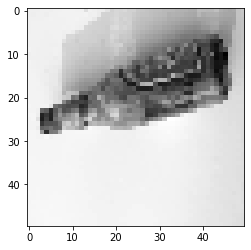

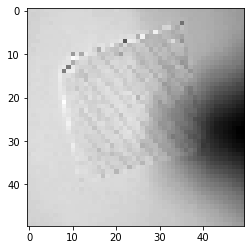

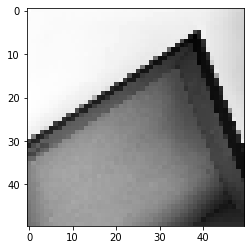

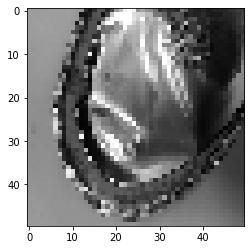

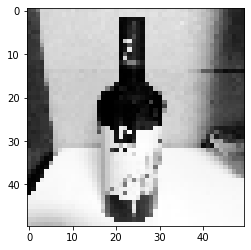

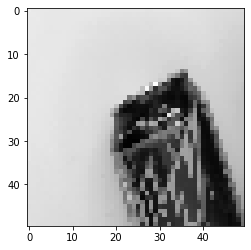

In [32]:
# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X[sample].reshape((IMG_SIZE, IMG_SIZE))
  plt.imshow(reshaped_image, cmap='gray')
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X[sample])

In [33]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(10, 50, 50, 1)


In [34]:
# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

[[1.57106348e-04 9.99842882e-01 8.41111509e-15 2.30197212e-15]
 [1.00000000e+00 1.25503448e-08 2.79514184e-20 5.91399524e-21]
 [5.41920842e-10 1.00000000e+00 5.14836304e-24 9.74534110e-25]
 [1.00358051e-08 1.00000000e+00 5.67651209e-20 1.27383544e-20]
 [1.37118082e-06 9.99998569e-01 3.71733752e-19 1.23907287e-19]
 [2.87013409e-05 9.99971271e-01 1.29964262e-10 5.38916828e-11]
 [1.84961313e-12 1.00000000e+00 4.19881978e-29 2.77014046e-30]
 [6.04471788e-05 9.99939561e-01 8.08163423e-27 5.02516193e-28]
 [2.24587747e-32 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.89898069e-09 1.00000000e+00 9.80672987e-24 1.07948900e-24]]


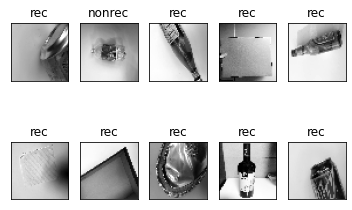

In [35]:
# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
fig=plt.figure()
num=0 # an integer type of variable
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
    
    num = num + 1
    
    y = fig.add_subplot(2,5,num) # plot the arrangement of the images 
    reshaped_image = X[sample].reshape((IMG_SIZE, IMG_SIZE)) #Reshape the image to a particular size
    
    #If else statement to locate the correct label
    if classes[num-1] == 0 : str_label = "nonrec"
    if classes[num-1] == 1 : str_label = "rec"
  
    # Generate a plot
    reshaped_image = X[sample].reshape((50, 50))
    y.imshow(reshaped_image, cmap='gray')
    plt.title(str_label) # Print the Label for each Image perdiction, which BlackPink member the image classified as
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [37]:
# Save the model
model.save('saved_model/trained_model_CNN')

INFO:tensorflow:Assets written to: saved_model/trained_model_CNN\assets
